In [1]:
import numpy as np
import bilby
import matplotlib.pyplot as plt
%matplotlib inline

C = 299792458.
G = 6.67408*1e-11
Mo = 1.989*1e30
Mpc = 3.086*1e22

# Set up a random seed for result reproducibility.
np.random.seed(150914)


In [2]:
time_of_event = 1187008882.4
post_trigger_duration = 1
duration = 16
analysis_start = time_of_event + post_trigger_duration - duration
sampling_frequency = 1024.

waveform_arguments = dict(waveform_approximant='PeriastronEccFD',
                          reference_frequency=10., minimum_frequency=15.)

waveform_generator = bilby.gw.WaveformGenerator( duration=duration, sampling_frequency=sampling_frequency, frequency_domain_source_model=bilby.gw.source.lal_PeriastronEccFD, waveform_arguments=waveform_arguments)

minimum_frequency = 15.0
maximum_frequency = 510.0

ifos = bilby.gw.detector.InterferometerList(['H1', 'L1', 'V1'])
for ifo in ifos:
    ifo.minimum_frequency = minimum_frequency
    ifo.maximum_frequency = maximum_frequency
ifos.set_strain_data_from_power_spectral_densities(
    sampling_frequency=sampling_frequency, duration=duration,
    start_time=analysis_start)

05:54 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_PeriastronEccFD
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


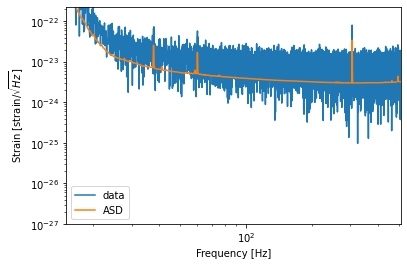

In [3]:
#to plot the frequency domain  
H1 = ifos[0]

fig, ax = plt.subplots()
idxs = H1.strain_data.frequency_mask  # This is a boolean mask of the frequencies which we'll use in the analysis
ax.loglog(H1.strain_data.frequency_array[idxs],
          np.abs(H1.strain_data.frequency_domain_strain[idxs]),
          label="data")
ax.loglog(H1.frequency_array[idxs],
          H1.amplitude_spectral_density_array[idxs],
          label="ASD")

ax.set_xlim(15.,510.)
ax.set_ylim(1e-27,2.327737159425905e-22)


ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Strain [strain/$\sqrt{Hz}$]")
ax.legend()
plt.show()

In [5]:
prior = bilby.core.prior.PriorDict()
prior['chirp_mass'] = bilby.core.prior.Uniform(name='chirp_mass', minimum=0.8705505632961241,maximum=2.611651689888372)
prior['mass_ratio'] = bilby.core.prior.Uniform(name='mass_ratio', minimum=0.3333333333333333, maximum=1)
prior['eccentricity'] = 0.0001
prior["luminosity_distance"] = 40.7
prior["theta_jn"] = bilby.core.prior.Sine(name='theta_jn')
prior["psi"] = bilby.core.prior.Uniform(name='psi', minimum=0, maximum=6.283185307179586)
prior["phase"] = bilby.core.prior.Uniform(name='phase', minimum=0, maximum=6.283185307179586)
prior["geocent_time"] = 1187008882.4
prior["ra"] = 3.44615914
prior["dec"] = -0.40808407

#this is to run the code faster
likelihood = bilby.gw.likelihood.GravitationalWaveTransient(
    interferometers=ifos, waveform_generator=waveform_generator, priors=prior, phase_marginalization=True )

In [ ]:
result_short = bilby.core.sampler.run_sampler(
    likelihood, prior, sampler='dynesty', outdir='outdir_GW170817', label="eccn_GW170817",
    nlive=500, dlogz=3.0, npool=8 )

06:07 bilby INFO    : Running for label 'eccn_GW170817', output will be saved to 'outdir_GW170817'
06:07 bilby INFO    : Using lal version 7.1.7.1
06:07 bilby INFO    : Using lal git version Branch: master;Tag: None;Id: 7eef7079ec7a112132bd11eb292c5535d2ebf6b2;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
06:07 bilby INFO    : Using lalsimulation version 3.1.2.1
06:07 bilby INFO    : Using lalsimulation git version Branch: master;Tag: None;Id: 7eef7079ec7a112132bd11eb292c5535d2ebf6b2;;Builder: Unknown User <>;Repository status: UNCLEAN: Modified working tree
06:08 bilby INFO    : Search parameters:
06:08 bilby INFO    :   chirp_mass = Uniform(minimum=0.8705505632961241, maximum=2.611651689888372, name='chirp_mass', latex_label='$\\mathcal{M}$', unit=None, boundary=None)
06:08 bilby INFO    :   mass_ratio = Uniform(minimum=0.3333333333333333, maximum=1, name='mass_ratio', latex_label='$q$', unit=None, boundary=None)
06:08 bilby INFO    :   theta_jn = Sine(m

0it [00:00, ?it/s]

06:09 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 1800, 'nlive': 500, 'first_update': None, 'walks': 100, 'npdim': None, 'rstate': None, 'queue_size': 8, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7f9efde7bd60>>, 'dlogz': 3.0, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 5, 'print_method': 'tqdm'}
06:09 bilby INFO    : Checkpoint every check_point_delta_t = 600s
06:09 bilby INFO    : Using dynesty version 1.0.1
06:09 bilby INFO    : Using the bil

1084it [18:37,  1.25s/it, bound:0 nc:  4 ncall:4.5e+03 eff:24.0% logz-ratio=-678.50+/-0.17 dlogz:665.747>3] 

06:27 bilby INFO    : Written checkpoint file outdir_GW170817/eccn_GW170817_resume.pickle


1395it [30:44,  3.42s/it, bound:0 nc: 23 ncall:8.6e+03 eff:16.3% logz-ratio=-412.36+/-0.18 dlogz:399.737>3]

06:40 bilby INFO    : Written checkpoint file outdir_GW170817/eccn_GW170817_resume.pickle


1594it [43:09,  9.13s/it, bound:0 nc:117 ncall:1.3e+04 eff:12.5% logz-ratio=-292.00+/-0.18 dlogz:278.107>3]

06:52 bilby INFO    : Written checkpoint file outdir_GW170817/eccn_GW170817_resume.pickle


1752it [55:43,  7.32s/it, bound:0 nc: 84 ncall:1.7e+04 eff:10.4% logz-ratio=-222.14+/-0.18 dlogz:207.962>3]

07:05 bilby INFO    : Written checkpoint file outdir_GW170817/eccn_GW170817_resume.pickle


1779it [1:12:22, 65.03s/it, bound:7 nc:313 ncall:2.0e+04 eff:8.8% logz-ratio=-213.85+/-0.17 dlogz:199.336>3] 

07:21 bilby INFO    : Written checkpoint file outdir_GW170817/eccn_GW170817_resume.pickle


1795it [1:28:22, 66.22s/it, bound:17 nc:348 ncall:2.5e+04 eff:7.2% logz-ratio=-208.03+/-0.17 dlogz:193.390>3] 

07:37 bilby INFO    : Written checkpoint file outdir_GW170817/eccn_GW170817_resume.pickle


1812it [1:43:06, 46.76s/it, bound:27 nc:  1 ncall:3.0e+04 eff:6.1% logz-ratio=-202.29+/-0.18 dlogz:187.427>3]

07:52 bilby INFO    : Written checkpoint file outdir_GW170817/eccn_GW170817_resume.pickle


1824it [1:53:14, 37.62s/it, bound:36 nc:335 ncall:3.4e+04 eff:5.4% logz-ratio=-198.26+/-0.18 dlogz:183.757>3] 

In [ ]:
prior-dict = {
chirp_mass = Uniform(name='chirp_mass', minimum=0.8705505632961241,maximum=2.611651689888372),
mass_ratio = Uniform(name='mass_ratio', minimum=0.3333333333333333, maximum=1),
eccentricity = 0.0001,
luminosity_distance = 40.7,
theta_jn = Sine(name='theta_jn'),
psi =  Uniform(name='psi', minimum=0, maximum=6.283185307179586),
phase = Uniform(name='phase', minimum=0, maximum=6.283185307179586),
geocent_time = Uniform(1187008882.33, 1187008882.53, name='geocent_time', unit='s'),
ra = 3.44615914,
dec =  -0.40808407,
}
